## Importing packages

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt


In [2]:
# Load the dataset
data = pd.read_csv('dataset.csv')

# Drop columns that are not necessary for clustering
#data = data.drop(columns=['analysis_url', 'track_href', 'type', 'uri'])

# Handle missing values if any
data = data.dropna()
numeric_columns = ['danceability', 'energy', 'key', 'loudness', 'mode',
                   'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature']
# Standardize the numeric features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data[numeric_columns])

# Convert scaled features to DataFrame
scaled_data = pd.DataFrame(scaled_features, columns=numeric_columns)
scaled_data['track_id'] = data['track_id'].values

# Check the standardized data
print(scaled_data.head())


   danceability    energy       key  loudness      mode  speechiness  \
0      0.629239 -0.717147 -1.210434  0.300825 -1.326297     0.551843   
1     -0.845908 -1.889974 -1.210434 -1.784739  0.753979    -0.078995   
2     -0.742187 -1.122667 -1.491334 -0.293289  0.753979    -0.273827   
3     -1.733301 -2.312987 -1.491334 -2.039246  0.753979    -0.457309   
4      0.295026 -0.788709 -0.929534 -0.282751  0.753979    -0.303146   

   acousticness  instrumentalness  liveness   valence     tempo  \
0     -0.850193         -0.504111  0.758735  0.929315 -1.141854   
1      1.831744         -0.504097 -0.591216 -0.798681 -1.489708   
2     -0.315489         -0.504115 -0.507172 -1.365679 -1.528303   
3      1.774605         -0.503886 -0.428381 -1.276965  1.987857   
4      0.463409         -0.504115 -0.686290 -1.184394 -0.073343   

   time_signature                track_id  
0        0.221824  5SuOikwiRyPMVoIQDJUgSV  
1        0.221824  4qPNDBW1i3p13qLCt0Ki3A  
2        0.221824  1iJBSr7s7jYXz

In [3]:
feature_weights = {
    'danceability': 1.0,
    'energy': 1.0,
    'valence': 0.9,
    'tempo': 0.9,
    'acousticness': 0.5,
    'instrumentalness': 0.5,
    'loudness': 0.3,
    'speechiness': 0.3,
    'liveness': 0.3,
    'key': 0.2,
    'mode': 0.2,
    'time_signature': 0.2
}

# Apply weights
for feature, weight in feature_weights.items():
    scaled_data[feature] *= weight

# Check the weighted features
print(scaled_data.head())


   danceability    energy       key  loudness      mode  speechiness  \
0      0.629239 -0.717147 -0.242087  0.090248 -0.265259     0.165553   
1     -0.845908 -1.889974 -0.242087 -0.535422  0.150796    -0.023698   
2     -0.742187 -1.122667 -0.298267 -0.087987  0.150796    -0.082148   
3     -1.733301 -2.312987 -0.298267 -0.611774  0.150796    -0.137193   
4      0.295026 -0.788709 -0.185907 -0.084825  0.150796    -0.090944   

   acousticness  instrumentalness  liveness   valence     tempo  \
0     -0.425096         -0.252056  0.227621  0.836383 -1.027669   
1      0.915872         -0.252048 -0.177365 -0.718813 -1.340737   
2     -0.157745         -0.252057 -0.152152 -1.229112 -1.375472   
3      0.887303         -0.251943 -0.128514 -1.149269  1.789072   
4      0.231705         -0.252057 -0.205887 -1.065955 -0.066009   

   time_signature                track_id  
0        0.044365  5SuOikwiRyPMVoIQDJUgSV  
1        0.044365  4qPNDBW1i3p13qLCt0Ki3A  
2        0.044365  1iJBSr7s7jYXz

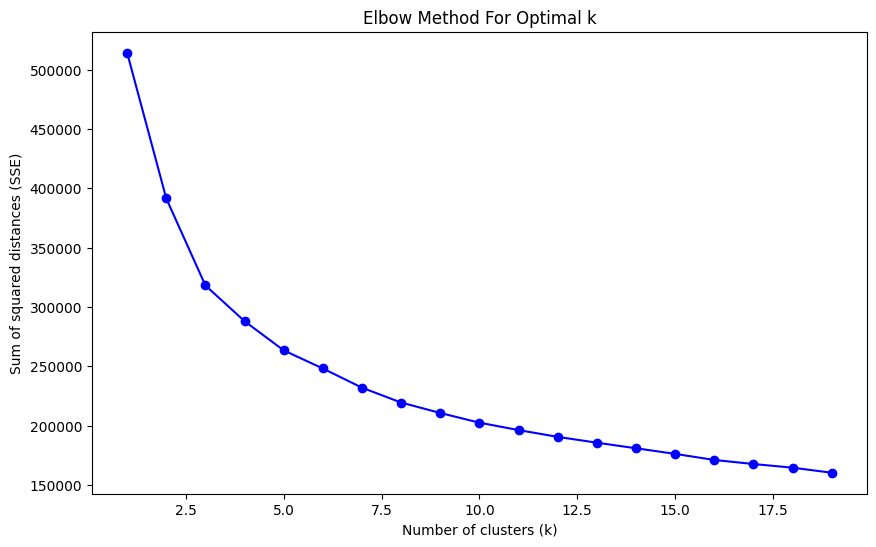

In [4]:
# Determine the optimal number of clusters using the elbow method
sse = []
k_range = range(1, 20)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data.drop(columns=['track_id']))
    sse.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(k_range, sse, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of squared distances (SSE)')
plt.title('Elbow Method For Optimal k')
plt.show()
  # ako trqbva da ispolzvam k means model shte trqbva da set upna predvaritelno broq clusteri>? nujno li e da p raq model we miana

In [5]:
# Select the optimal number of clusters (k)
optimal_k = 10  # Example: chosen based on the elbow plot

# Fit the k-means model
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(scaled_data.drop(columns=['track_id']))

# Assign cluster labels to each song
scaled_data['cluster'] = kmeans.labels_

# Check the cluster assignments
print(scaled_data.head())


   danceability    energy       key  loudness      mode  speechiness  \
0      0.629239 -0.717147 -0.242087  0.090248 -0.265259     0.165553   
1     -0.845908 -1.889974 -0.242087 -0.535422  0.150796    -0.023698   
2     -0.742187 -1.122667 -0.298267 -0.087987  0.150796    -0.082148   
3     -1.733301 -2.312987 -0.298267 -0.611774  0.150796    -0.137193   
4      0.295026 -0.788709 -0.185907 -0.084825  0.150796    -0.090944   

   acousticness  instrumentalness  liveness   valence     tempo  \
0     -0.425096         -0.252056  0.227621  0.836383 -1.027669   
1      0.915872         -0.252048 -0.177365 -0.718813 -1.340737   
2     -0.157745         -0.252057 -0.152152 -1.229112 -1.375472   
3      0.887303         -0.251943 -0.128514 -1.149269  1.789072   
4      0.231705         -0.252057 -0.205887 -1.065955 -0.066009   

   time_signature                track_id  cluster  
0        0.044365  5SuOikwiRyPMVoIQDJUgSV        1  
1        0.044365  4qPNDBW1i3p13qLCt0Ki3A        2  
2    

In [6]:
from scipy.spatial.distance import euclidean

# Assume 'scaled_data' contains standardized features and cluster labels

def recommend_songs_with_distance(track_id, data, num_recommendations=10):
    if track_id not in data['track_id'].values:
        return f"Track ID {track_id} not found in the dataset."
    
    # Get the cluster of the target song
    target_cluster = data[data['track_id'] == track_id]['cluster'].values[0]
    
    # Get all songs from the same cluster
    cluster_songs = data[data['cluster'] == target_cluster]
    
    # Exclude the target song from recommendations
    cluster_songs = cluster_songs[cluster_songs['track_id'] != track_id]
    
    # If there are not enough songs in the cluster, adjust the number of recommendations
    if len(cluster_songs) < num_recommendations:
        num_recommendations = len(cluster_songs)
    
    # Get features of the target song
    target_song_features = scaled_data[scaled_data['track_id'] == track_id][numeric_columns].values[0]
    
    # Calculate distances from the target song to all other songs in the cluster
    distances = []
    for index, row in cluster_songs.iterrows():
        # Ensure song_features have the same columns as target_song_features
        song_features = row[numeric_columns].values
        if target_song_features.shape != song_features.shape:
            continue  # Skip if shapes do not match
        
        distance = euclidean(target_song_features, song_features)
        distances.append((row['track_id'], distance))
    
    # Sort songs by distance (closest first)
    distances.sort(key=lambda x: x[1])
    
    # Select top recommendations based on distance
    recommendations = [track_id for track_id, _ in distances[:num_recommendations]]
    
    return recommendations

# Example usage
track_id_to_recommend = '4gHnSNHs8RyVukKoWdS99f'  # Replace with a valid track_id from your dataset
recommended = recommend_songs_with_distance(track_id_to_recommend, scaled_data)
print("Recommended Songs (Distance-based):", recommended)


Recommended Songs (Distance-based): ['4AsKqQulOFpEZpaBsbrF4P', '15zTndlMZlHk4VJtgAMXah', '1p1H3L57ilAdt1xqb3VDx3', '3k458zzqcF9UeRfZqRbZYr', '4LK7Zr5pHt6vGr54Ut38su', '3k458zzqcF9UeRfZqRbZYr', '3k458zzqcF9UeRfZqRbZYr', '4LK7Zr5pHt6vGr54Ut38su', '3k458zzqcF9UeRfZqRbZYr', '4LK7Zr5pHt6vGr54Ut38su']
